# CISC/CMPE 452/COGS 400 Assignment 2 - Backpropagation (15 points)  

Please put your name and student id here

    Liam Patterson, #20121376

- The notebook file has clearly marked blocks where you are expected to write code. Do not write or modify any code outside of these blocks.
- Make sure to restart and run all the cells from the beginning before submission. Do not clear out the outputs. You will only get credit for code that has been run.
- Mark will be deducted based on late policy (-1% of the course total marks per day after due date until the end date after which no assignments will be accepted)


## [Part 1 (9 points)](#Part-1)  

### Build Model1 (7 points)  
Use Pytorch to implement a three-layer Neural Network (input layer - hidden layer - output layer) and update the weights with backpropagation  
- 1. Implement forward and calculate the output (1 point)  
- 2. Calculate errors and loss (3 points)  
- 3. Update the weights with backpropagation (1 points)  
- 4. Predict function (1 point)  
- 5. Activation function (Sigmoid function) (1 point)  

### Evaluator Function (1 point)  
Implement the evaluator function with Pytorch or Numpy only   
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score

### Train and Evaluate Model1 (1 point)  
Train Model1 with customized hidden size, learning rate, number of iterations and batch size  
Use the predict function to predict the labels with the test dataset  
Evaluate the prediction results  
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score

## [Part 2 (6 points)](#Part-2)  

Use another machine learning framework (**scikit-learn, Tensorflow and Pytorch**) to build MLP
e.g. 
  1. https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
  2. https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
  3. https://pytorch.org/tutorials/beginner/examples_nn/polynomial_nn.html#sphx-glr-beginner-examples-nn-polynomial-nn-py
  
### Build Model2-1 (2 points)  
Implement Model2-1 with the same hidden nodes and optimization function as the model in Part 1  
Train and validate model. Use the best model on validation dataset to test on the test dataset  

### Train and Evaluate Model2-1 (1 point)
Evaluate the prediction results  
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score

### Build Model2-2 (2 points)  
Add one more hidden layer (2 hidden layers in total) to the model  
Describe Model2-2 (number of hidden nodes)  
Train and validate model. Use the best model on validation dataset to test on the test dataset  

### Train and Evaluate Model2-2 (1 point)
Evaluate the prediction results  
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score

In [2]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST

In [3]:
# you can go to Edit - Notebook settings to select GPU under the Hardware accelerator
# check the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [4]:
# build the dataset (train, validation and test)
def load_MNIST(n_val=10000, n_sample=1000, sample=False):
    n_val = n_val
    n_sample = n_sample
    train = MNIST(root = '.', train = True, download = True)
    test = MNIST(root = '.', train = False, download = True)
    
    # data preprocessing
    x_train, x_test = train.data/255, test.data/255
    x_train = x_train.reshape(x_train.shape[0], -1)
    x_test = x_test.reshape(x_test.shape[0], -1)
    y_train = torch.nn.functional.one_hot(train.targets)
    y_test = torch.nn.functional.one_hot(test.targets)
    
    data_dict = {}
    if sample:
        data_dict['x_train'] = x_train[:-n_val][:n_sample]
        data_dict['y_train'] = y_train[:-n_val][:n_sample]
        data_dict['x_val'] = x_train[-n_val:][:n_sample//10]
        data_dict['y_val'] = y_train[-n_val:][:n_sample//10]
        data_dict['x_test'] = x_test[:n_sample//10]
        data_dict['y_test'] = y_test[:n_sample//10]
    else:
        data_dict['x_train'] = x_train[:-n_val]
        data_dict['y_train'] = y_train[:-n_val]
        data_dict['x_val'] = x_train[-n_val:]
        data_dict['y_val'] = y_train[-n_val:]
        data_dict['x_test'] = x_test
        data_dict['y_test'] = y_test
    return data_dict

In [5]:
# you can start with a small sample dataset by setting sample=True
data_dict = load_MNIST(sample=False)
print('Train data shape:', data_dict['x_train'].shape)
print('Train labels shape:', data_dict['y_train'].shape)
print('Validation data shape:', data_dict['x_val'].shape)
print('Validation labels shape:', data_dict['y_val'].shape)
print('Test data shape:', data_dict['x_test'].shape)
print('Test labels shape:', data_dict['y_test'].shape)

Train data shape: torch.Size([50000, 784])
Train labels shape: torch.Size([50000, 10])
Validation data shape: torch.Size([10000, 784])
Validation labels shape: torch.Size([10000, 10])
Test data shape: torch.Size([10000, 784])
Test labels shape: torch.Size([10000, 10])


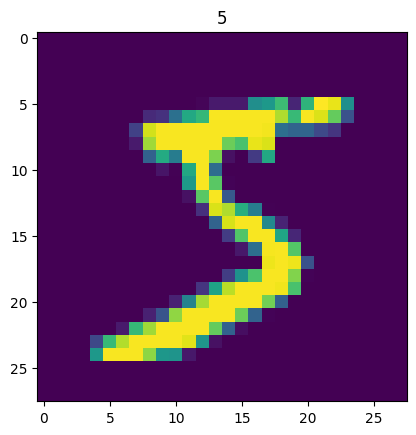

In [6]:
# plot an example
plt.imshow(data_dict['x_train'][0].reshape(28, 28))
plt.title(data_dict['y_train'][0].argmax().item())
plt.show()

## Part 1

In [7]:
# TODO: use the predict function to predict the lables with the test dataset
# TODO: evaluate the prediction results (accuracy, recall score, precision and F1 score)
####################################################################################################
# enter code here to calculate the hidden layer output and output layer output
# Write a function to analyze the result
import numpy as np
from torchmetrics import ConfusionMatrix

def evaluator(test_y, pred_y):
    
    # num_classes = test_y.shape[1]
    num_classes = 10
    # test_y = torch.argmax(test_y, dim=1)
            
    confusion_matrix = ConfusionMatrix(num_classes=num_classes)
    confusion_matrix = confusion_matrix(pred_y, test_y)
    
#     convert from pytorch tensor to numpy array
    confusion_matrix = confusion_matrix.cpu().detach().numpy()

    accuracy = torch.sum(test_y == pred_y).item()/len(test_y)
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 1)
    f1_score = (2*precision*recall)/(precision+recall)

    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(x=j, y=i,s=confusion_matrix[i, j], va='center', ha='center', size='large')
    
    ax.yaxis.set_ticks([i for i in range(num_classes)])
    ax.xaxis.set_ticks([i for i in range(num_classes)])
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    
    for i in range(num_classes):
        print('Class ', i)
        print('precision: ', precision[i])
        print('recall: ', recall[i])
        print('f1_score: ', f1_score[i])
        print('---------')
    
    print('Overall:')
    print('precision: ', precision.mean())
    print('recall: ', recall.mean())
    print('f1_score: ', f1_score.mean())
    print('accuracy: ', accuracy)
        

####################################################################################################

In [8]:
class NN(object):
    def __init__(self, learning_rate, n_iters, batch_size, hidden_size, device, dtype=torch.float32):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.hidden_size = hidden_size
        self.device = device
        self.dtype = dtype
        self.history = {}
        self.history['train_acc'], self.history['val_acc'], self.history['loss'] = [], [], []
    
    # 5. activation function
    def sigmoid(self, x):
        ####################################################################################################
        # enter code here to implement the activation function
        return 1/(1+torch.exp(-x))               
        ####################################################################################################

    def sigmoid_derivative(self, y):
        return y*(1.0-y)
    
    def train(self, x, y, x_val, y_val, verbose=1):
        n_train = x.shape[0]
        n_val = x_val.shape[0]
        input_size = x.shape[1]
        num_classes = y.shape[1]
        
        # weight initialization
        self.W1 = torch.randn(input_size, self.hidden_size, dtype=self.dtype, device=self.device) * 0.01
        self.W2 = torch.randn(self.hidden_size, num_classes, dtype=self.dtype, device=self.device) * 0.01

        # TODO: train the weights with the input data and labels
        for i in range(self.n_iters):
            loss = 0
            data = getBatch(x, y, self.batch_size) 
            for x_batch, y_batch in data:
                
                # 1. forward
                ####################################################################################################
                # enter code here to calculate the hidden layer output and output layer output
                hidden_activation = torch.matmul(x_batch, self.W1)
                hidden = self.sigmoid(hidden_activation)
        
                output_activation = torch.matmul(hidden, self.W2)
                output = self.sigmoid(output_activation)
                ####################################################################################################

                # 2. error and loss
                ####################################################################################################
                # enter code here to calculate the output error, MSE loss, delta output and delta hidden
                output_error = (y_batch - output)
                new_loss = (output_error**2).mean().item()

                if new_loss == new_loss:
                    loss += new_loss 
                
                delta_output = output_error * self.sigmoid_derivative(output)

                w2_reshaped = torch.reshape(self.W2, (self.W2.shape[1], self.W2.shape[0]))                
                
                delta_hidden = torch.matmul(delta_output, w2_reshaped) * self.sigmoid_derivative(hidden)
                ####################################################################################################

                # 3. backward
                ####################################################################################################
                # enter code here to calculate delta weights and update the weights
                hidden_reshaped = torch.reshape(hidden, (hidden.shape[1], hidden.shape[0]))
                self.W2 += self.learning_rate * torch.matmul(hidden_reshaped, delta_output)
                
                x_reshaped = torch.reshape(x_batch, (x_batch.shape[1], x_batch.shape[0]))
                self.W1 += self.learning_rate * torch.matmul(x_reshaped, delta_hidden)
                ####################################################################################################

            # calculate the accuracy and save the training history
            y_pred = self.predict(x)
            train_acc = torch.sum(torch.argmax(y, dim=1) == y_pred) / n_train
            self.history['train_acc'].append(train_acc)
            self.history['loss'].append(loss)
            
            y_pred = self.predict(x_val)
            val_acc = torch.sum(torch.argmax(y_val, dim=1) == y_pred) / n_val
            self.history['val_acc'].append(val_acc)
            if verbose:
                print('epoch %d, loss %.4f, train acc %.3f, validation acc %.3f'
                  % (i + 1, loss, train_acc, val_acc))
    
    # 4. predict function 
    def predict(self, x):
        ####################################################################################################
        # enter code here to implement the predict function
        # TODO: use the trained weights to predict labels and return the predicted labels
        # remember to use torch.argmax() to return the true labels
        hidden_activation = torch.matmul(x, self.W1)
        hidden = self.sigmoid(hidden_activation)

        output_activation = torch.matmul(hidden, self.W2)
        output = self.sigmoid(output_activation)
    
        return torch.argmax(output, dim=1)
        ####################################################################################################


def getBatch(x, y, batch_size):
    n_epoch = x.shape[0] // batch_size
    for i in range(n_epoch):
        x_batch = x[i * batch_size : (i+1) * batch_size]
        y_batch = y[i * batch_size : (i+1) * batch_size]
        yield x_batch, y_batch
    x_batch = x[(i+1) * batch_size:]
    y_batch = y[(i+1) * batch_size:]    
    yield x_batch, y_batch

In [9]:
####################################################################################################
# enter code here to train Model1
# TODO: set your desired hidden size, learning rate, number of iterations and batch size
# remeber to load the dataset to the device (e.g. data_dict['x_train'].to(device))
hidden_size = 100

model = NN(0.1, 15, 1,  hidden_size, device)
model.train(data_dict['x_train'].to(device),
            data_dict['y_train'].to(device),
            data_dict['x_val'].to(device),
            data_dict['y_val'].to(device), 
            verbose=1)

####################################################################################################

epoch 1, loss 1226.5144, train acc 0.928, validation acc 0.934
epoch 2, loss 537.8337, train acc 0.947, validation acc 0.953
epoch 3, loss 420.6446, train acc 0.958, validation acc 0.961
epoch 4, loss 352.4233, train acc 0.964, validation acc 0.965
epoch 5, loss 306.2914, train acc 0.969, validation acc 0.967
epoch 6, loss 271.3809, train acc 0.973, validation acc 0.967
epoch 7, loss 244.3544, train acc 0.975, validation acc 0.967
epoch 8, loss 222.6875, train acc 0.977, validation acc 0.968
epoch 9, loss 204.5814, train acc 0.979, validation acc 0.968
epoch 10, loss 188.5483, train acc 0.980, validation acc 0.969
epoch 11, loss 174.0881, train acc 0.982, validation acc 0.968
epoch 12, loss 161.3122, train acc 0.983, validation acc 0.969
epoch 13, loss 149.9272, train acc 0.984, validation acc 0.969
epoch 14, loss 139.9564, train acc 0.984, validation acc 0.969
epoch 15, loss 131.2327, train acc 0.985, validation acc 0.970


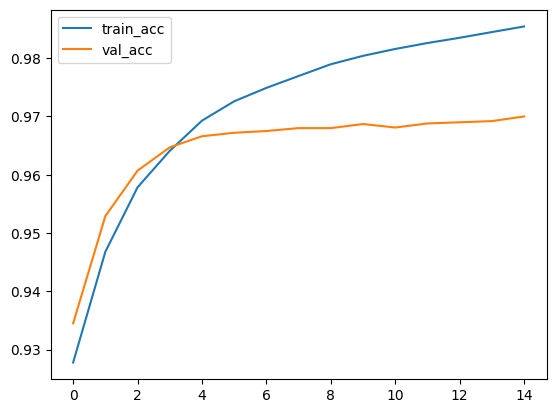

In [10]:
plt.plot(model.history['train_acc'], label='train_acc')
plt.plot(model.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

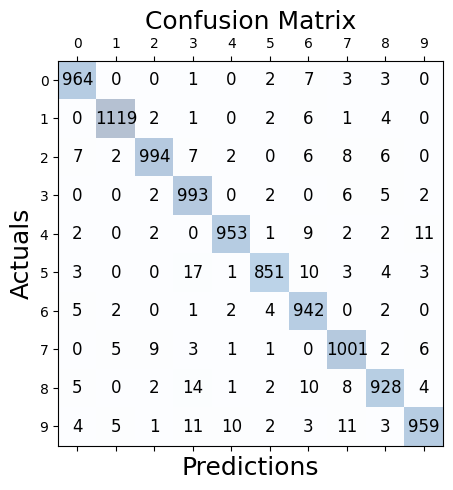

Class  0
precision:  0.9737373737373738
recall:  0.9836734693877551
f1_score:  0.9786802030456854
---------
Class  1
precision:  0.9876434245366285
recall:  0.9859030837004406
f1_score:  0.9867724867724867
---------
Class  2
precision:  0.9822134387351779
recall:  0.9631782945736435
f1_score:  0.9726027397260274
---------
Class  3
precision:  0.9475190839694656
recall:  0.9831683168316832
f1_score:  0.9650145772594753
---------
Class  4
precision:  0.9824742268041237
recall:  0.9704684317718941
f1_score:  0.9764344262295082
---------
Class  5
precision:  0.9815455594002307
recall:  0.9540358744394619
f1_score:  0.9675952245594088
---------
Class  6
precision:  0.9486404833836858
recall:  0.9832985386221295
f1_score:  0.9656586365966171
---------
Class  7
precision:  0.959731543624161
recall:  0.9737354085603113
f1_score:  0.9666827619507484
---------
Class  8
precision:  0.9676746611053181
recall:  0.9527720739219713
f1_score:  0.9601655457837559
---------
Class  9
precision:  0.973604

In [11]:
####################################################################################################
# enter code here to evaluate Model1 with test set
# TODO: use the trained Model1 to predict the labels of test set and evaluate the results with the evaluator
predictions = model.predict(data_dict['x_test'].to(device))

y_test = data_dict['y_test'].to(device)
y_test_labels = torch.argmax(y_test, dim=1)

evaluator(y_test_labels , predictions)
####################################################################################################

## Part 2

### Model2-1

In [163]:
####################################################################################################
# enter code here to implement Model2-1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_size = data_dict['x_test'].shape[1]
num_classes = data_dict['y_test'].shape[1]

# convert from pytorch tensor to tensorflow tensor
tf_dict = {}
for key in data_dict:
    temp = data_dict[key].cpu().detach().numpy()
    tf_dict[key] = tf.convert_to_tensor(temp)


TF_model_1 = keras.Sequential()

TF_model_1.add(keras.Input(shape=(input_size, )))
TF_model_1.add(layers.Dense(100, activation='sigmoid'))
TF_model_1.add(layers.Dense(num_classes, activation='sigmoid'))


optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.0)

TF_model_1.compile(  
    optimizer=optimizer,
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy',
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
    ]
)
####################################################################################################

In [164]:
####################################################################################################
# enter code here to train Model2-1
history = TF_model_1.fit(
    tf_dict['x_train'],
    tf_dict['y_train'],
    epochs=20,
    batch_size=1,
    validation_data=(tf_dict['x_val'], tf_dict['y_val']))

TF_model_1.summary()
####################################################################################################

Epoch 1/20
50000/50000 [==============================] - 123s 2ms/step - loss: 0.0304 - accuracy: 0.8374 - recall_15: 0.6882 - precision_14: 0.9386 - val_loss: 0.0167 - val_accuracy: 0.9108 - val_recall_15: 0.8532 - val_precision_14: 0.9429
Epoch 2/20
50000/50000 [==============================] - 122s 2ms/step - loss: 0.0167 - accuracy: 0.9075 - recall_15: 0.8550 - precision_14: 0.9414 - val_loss: 0.0134 - val_accuracy: 0.9240 - val_recall_15: 0.8852 - val_precision_14: 0.9497
Epoch 3/20
50000/50000 [==============================] - 136s 3ms/step - loss: 0.0140 - accuracy: 0.9205 - recall_15: 0.8809 - precision_14: 0.9482 - val_loss: 0.0118 - val_accuracy: 0.9348 - val_recall_15: 0.8997 - val_precision_14: 0.9549
Epoch 4/20
50000/50000 [==============================] - 122s 2ms/step - loss: 0.0123 - accuracy: 0.9295 - recall_15: 0.8972 - precision_14: 0.9536 - val_loss: 0.0106 - val_accuracy: 0.9407 - val_recall_15: 0.9087 - val_precision_14: 0.9613
Epoch 5/20
50000/50000 [========

313/313 [==============================] - 1s 2ms/step


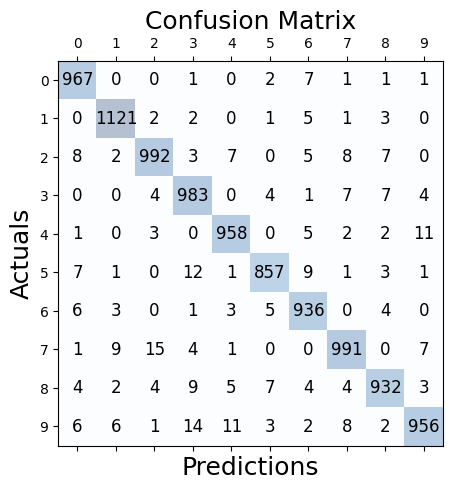

Class  0
precision:  0.967
recall:  0.986734693877551
f1_score:  0.9767676767676767
---------
Class  1
precision:  0.9798951048951049
recall:  0.9876651982378855
f1_score:  0.98376480912681
---------
Class  2
precision:  0.9715964740450539
recall:  0.9612403100775194
f1_score:  0.9663906478324403
---------
Class  3
precision:  0.9552964042759962
recall:  0.9732673267326732
f1_score:  0.9641981363413438
---------
Class  4
precision:  0.9716024340770791
recall:  0.9755600814663951
f1_score:  0.9735772357723577
---------
Class  5
precision:  0.9749715585893061
recall:  0.9607623318385651
f1_score:  0.9678147939017505
---------
Class  6
precision:  0.9609856262833676
recall:  0.9770354906054279
f1_score:  0.9689440993788819
---------
Class  7
precision:  0.9687194525904204
recall:  0.9640077821011673
f1_score:  0.9663578742077036
---------
Class  8
precision:  0.9698231009365245
recall:  0.9568788501026694
f1_score:  0.9633074935400516
---------
Class  9
precision:  0.9725330620549338
reca

In [165]:
####################################################################################################
# enter code here to evaluate Model2-1

# make predictions on x test set
predictions = TF_model_1.predict(tf_dict['x_test'])

# use tf argmax to get index(number value) of the pprediction, just like in part 1.
prediction_labels = tf.math.argmax(predictions, axis=1)

# convert tf tensor to torch tensor, to make use of evaluator function written in part 1.
y_pred = torch.from_numpy(prediction_labels.numpy())

# since the test set is the same as before, the y_test_labels is already formatted as pytorch tensor
evaluator(y_test_labels, y_pred)
####################################################################################################

### Model2-2

In [167]:
####################################################################################################
# enter code here to implement Model2-2
TF_model_2 = keras.Sequential()

TF_model_2.add(keras.Input(shape=(input_size, )))
TF_model_2.add(layers.Dense(130, activation='sigmoid'))
TF_model_2.add(layers.Dense(60, activation='sigmoid'))
TF_model_2.add(layers.Dense(num_classes, activation='sigmoid'))


optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.0)

TF_model_2.compile(  
    optimizer=optimizer,
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy',
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
    ]
)

####################################################################################################

In [168]:
####################################################################################################
# enter code here to train Model2-2
history = TF_model_2.fit(
    tf_dict['x_train'],
    tf_dict['y_train'],
    epochs=20,
    batch_size=1,
    validation_data=(tf_dict['x_val'], tf_dict['y_val']))

TF_model_2.summary()
####################################################################################################

Epoch 1/20
50000/50000 [==============================] - 106s 2ms/step - loss: 0.0494 - accuracy: 0.6661 - recall_17: 0.4495 - precision_16: 0.9342 - val_loss: 0.0200 - val_accuracy: 0.8994 - val_recall_17: 0.8243 - val_precision_16: 0.9434
Epoch 2/20
50000/50000 [==============================] - 107s 2ms/step - loss: 0.0179 - accuracy: 0.9006 - recall_17: 0.8486 - precision_16: 0.9370 - val_loss: 0.0134 - val_accuracy: 0.9220 - val_recall_17: 0.8890 - val_precision_16: 0.9484
Epoch 3/20
50000/50000 [==============================] - 121s 2ms/step - loss: 0.0139 - accuracy: 0.9180 - recall_17: 0.8845 - precision_16: 0.9443 - val_loss: 0.0116 - val_accuracy: 0.9310 - val_recall_17: 0.9069 - val_precision_16: 0.9497
Epoch 4/20
50000/50000 [==============================] - 115s 2ms/step - loss: 0.0120 - accuracy: 0.9279 - recall_17: 0.9012 - precision_16: 0.9519 - val_loss: 0.0101 - val_accuracy: 0.9391 - val_recall_17: 0.9155 - val_precision_16: 0.9581
Epoch 5/20
50000/50000 [========

313/313 [==============================] - 1s 3ms/step


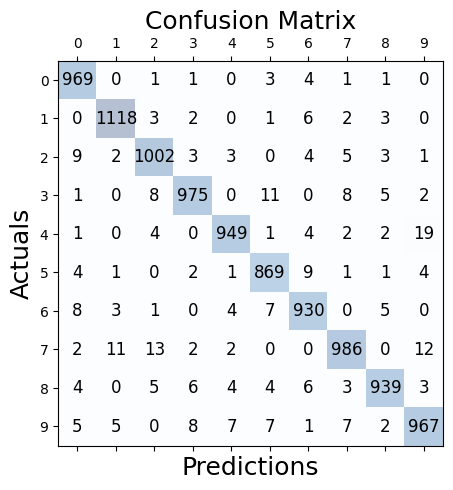

Class  0
precision:  0.9661016949152542
recall:  0.9887755102040816
f1_score:  0.9773071104387291
---------
Class  1
precision:  0.980701754385965
recall:  0.9850220264317181
f1_score:  0.982857142857143
---------
Class  2
precision:  0.9662487945998072
recall:  0.9709302325581395
f1_score:  0.9685838569357178
---------
Class  3
precision:  0.975975975975976
recall:  0.9653465346534653
f1_score:  0.9706321553011447
---------
Class  4
precision:  0.9783505154639175
recall:  0.9663951120162932
f1_score:  0.9723360655737705
---------
Class  5
precision:  0.9623477297895903
recall:  0.9742152466367713
f1_score:  0.9682451253481894
---------
Class  6
precision:  0.9647302904564315
recall:  0.9707724425887265
f1_score:  0.967741935483871
---------
Class  7
precision:  0.9714285714285714
recall:  0.9591439688715954
f1_score:  0.9652471855115027
---------
Class  8
precision:  0.9771071800208116
recall:  0.9640657084188912
f1_score:  0.9705426356589146
---------
Class  9
precision:  0.959325396

In [169]:
####################################################################################################
# enter code here to evaluate Model2-2

# make predictions on x test set
predictions_2 = TF_model_2.predict(tf_dict['x_test'])

prediction_labels_2 = tf.math.argmax(predictions_2, axis=1)

y_pred_2 = torch.from_numpy(prediction_labels_2.numpy())

evaluator(y_test_labels, y_pred_2)
####################################################################################################